In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#import jax
#import jax.numpy as jnp
#import flax.nnx as nnx
#from jax import random
#from flax import serialization
#import json
#import optax
import numpy as np
from sklearn.utils.estimator_checks import check_is_fitted
from sklearn.base import BaseEstimator, _fit_context
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
from tqdm.notebook import tqdm # progress bar
from sklearn.preprocessing import StandardScaler
import logging
from matplotlib.pyplot import plot


In [3]:
print(jax.devices())

[CpuDevice(id=0)]


In [25]:
features = np.loadtxt("../Data/Training_data/holes_features_many_mesh.txt")[:,[2,3,4,5,6,7,8,9]]#.reshape(-1,1)
labels = np.loadtxt("../Data/Training_data/holes_labels_many_mesh.txt")[:,[0]]

In [26]:

features = np.delete(features, [3,4], axis=1)  # Remove first two columns

# Split label array into individual columns
print(features.shape)
print(labels.shape)
# Concatenate to features
features_total_np = features

# Overwrite labels array with only the true label
labels_total_np = labels.reshape(-1, 1)




(4950604, 6)
(4950604, 1)


In [4]:
features_total_np.shape

(1645859, 7)

In [27]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(features_total_np, labels_total_np, test_size=0.2, random_state=42)



# Standardize input features (only fit on training data!)
scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_grid, _, y_grid, _ = train_test_split(X_train, y_train, train_size=0.4, random_state=42) # Only using 40% of the data for gridsearching



In [141]:
X_test.shape

(329139, 1)

In [28]:
import xgboost
from xgboost import XGBRegressor

estimator = XGBRegressor(n_estimators = 550, max_depth = 10, learning_rate = 0.01)
estimator.fit(X_train, y_train)
print('Train R2 score: ', estimator.score(X_train, y_train))
print('Test R2 score: ', estimator.score(X_test, y_test))


Train R2 score:  0.9943456270434271
Test R2 score:  0.9940260221774185


In [29]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import numpy as np

y_pred = estimator.predict(X_test)


# y_true: your ground truth values
# y_pred: your model's predictions

def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    max_err = max_error(y_true, y_pred)

    print(f"📈 Regression Evaluation Metrics")
    print(f"--------------------------------")
    print(f"R² Score         : {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Max Error        : {max_err:.4f}")
    
    
print_regression_metrics(y_test, y_pred)


📈 Regression Evaluation Metrics
--------------------------------
R² Score         : 0.9940
Mean Absolute Error (MAE): 0.0163
Mean Squared Error (MSE): 0.0045
Root Mean Squared Error (RMSE): 0.0670
Max Error        : 1.5347


# -----------------------

In [ ]:
param_grid = {
    "n_estimators": [450, 500, 550],           # number of trees
    "max_depth": [9, 10, 11, 12],                # depth of each tree
    "learning_rate": [0.01, 0.001],        # step size shrinkage
    "subsample": [0.2, 0.4, 0.6],              # % of data per tree
}


In [ ]:
search = GridSearchCV(
    XGBRegressor(),
    param_grid=param_grid,
    scoring="r2",
    cv=3,
    verbose=2
)


In [ ]:
search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[CV] END learning_rate=0.01, max_depth=9, n_estimators=450, subsample=0.2; total time=  31.5s
[CV] END learning_rate=0.01, max_depth=9, n_estimators=450, subsample=0.2; total time=  31.1s
[CV] END learning_rate=0.01, max_depth=9, n_estimators=450, subsample=0.2; total time=  29.3s
[CV] END learning_rate=0.01, max_depth=9, n_estimators=450, subsample=0.4; total time=  30.1s
[CV] END learning_rate=0.01, max_depth=9, n_estimators=450, subsample=0.4; total time=  30.5s
[CV] END learning_rate=0.01, max_depth=9, n_estimators=450, subsample=0.4; total time=  28.5s
[CV] END learning_rate=0.01, max_depth=9, n_estimators=450, subsample=0.6; total time=  28.0s
[CV] END learning_rate=0.01, max_depth=9, n_estimators=450, subsample=0.6; total time=  28.5s
[CV] END learning_rate=0.01, max_depth=9, n_estimators=450, subsample=0.6; total time=  28.6s
[CV] END learning_rate=0.01, max_depth=9, n_estimators=500, subsample=0.2; total time=  30.9s
[CV] END learning_rate=0.01, max_depth=9, n_estimators=500, 

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.001],
                         'max_depth': [9, 10, 11, 12],
                         'n_estimators': [450, 500, 550],
                         'subsample': [0.2, 0.4, 0.6]},
             scoring='r2', verbose=2)

In [23]:


from joblib import dump, load


dump(estimator, "./Holy_Grail.joblib")

['./Holy_Grail.joblib']

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import numpy as np

y_pred = estimator.predict(X_test)


# y_true: your ground truth values
# y_pred: your model's predictions

def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    max_err = max_error(y_true, y_pred)

    print(f"📈 Regression Evaluation Metrics")
    print(f"--------------------------------")
    print(f"R² Score         : {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Max Error        : {max_err:.4f}")
    
    
print_regression_metrics(y_test, y_pred)

📈 Regression Evaluation Metrics
--------------------------------
R² Score         : 0.9940
Mean Absolute Error (MAE): 0.0163
Mean Squared Error (MSE): 0.0045
Root Mean Squared Error (RMSE): 0.0670
Max Error        : 1.5347


<Figure size 1000x600 with 0 Axes>

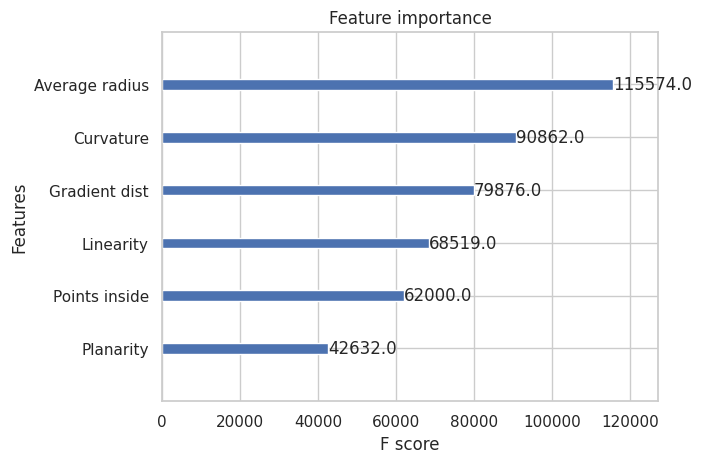

In [31]:
from xgboost import XGBRegressor, plot_importance
import matplotlib.pyplot as plt

feature_names = ["Curvature", "Linearity", "Planarity", "Average radius", "Points inside", "Gradient dist"]

estimator.get_booster().feature_names = feature_names
plt.figure(figsize=(10, 6))

plot_importance(estimator)

plt.savefig("F1_scores_xgboost2.png", dpi=1000)
plt.show()

Saving to: /mnt/c/Users/magnu/OneDrive/Dokumenter/GitHub/R-D/Code/Gradient NN/models/feature_importance_final_many_mesh.png


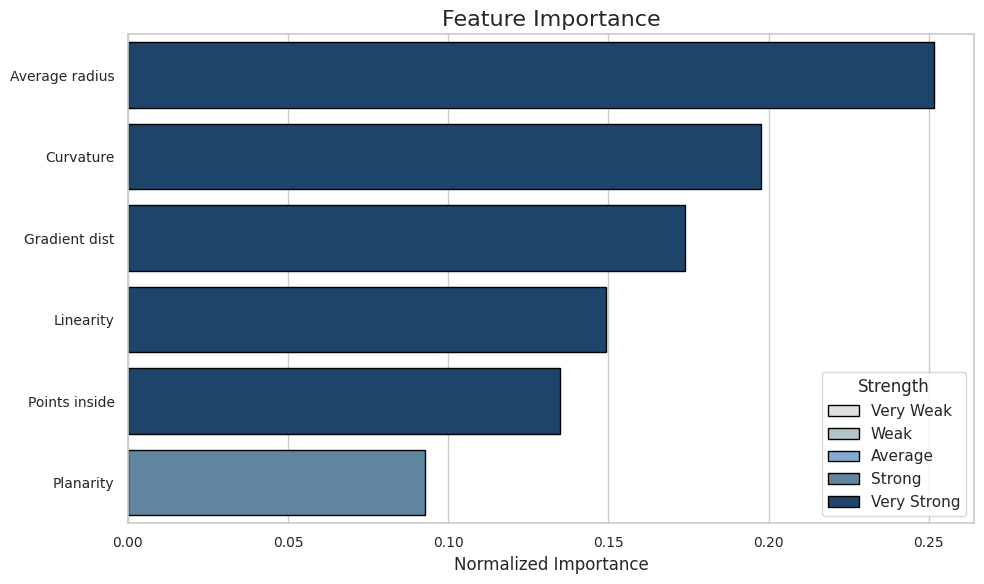

In [32]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
save_path = os.path.join(os.getcwd(), "feature_importance_final_many_mesh.png")
booster = estimator.get_booster()
importance = booster.get_score(importance_type='weight')

# Create DataFrame
df = pd.DataFrame(list(importance.items()), columns=["Feature", "F_Score"])
df["F_Score"] = df["F_Score"] / df["F_Score"].sum()  # Normalize
df = df.sort_values("F_Score", ascending=False)

# Categorize by importance strength
bins = [0, 0.01, 0.03, 0.07, 0.12, 1.0]
labels = ["Very Weak", "Weak", "Average", "Strong", "Very Strong"]
df["Strength"] = pd.cut(df["F_Score"], bins=bins, labels=labels)

# Color palette
palette = {
    "Very Weak": "#e0e0e0",
    "Weak": "#aec6cf",
    "Average": "#77aadd",
    "Strong": "#5588aa",
    "Very Strong": "#114477"
}

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x="F_Score",
    y="Feature",
    data=df,
    hue="Strength",
    dodge=False,
    palette=palette,
    edgecolor="black"
)

# Customize
plt.title("Feature Importance", fontsize=16)
plt.xlabel("Normalized Importance", fontsize=12)
plt.ylabel("")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Strength", loc="lower right", frameon=True)
plt.tight_layout()


print("Saving to:", save_path)
plt.savefig(save_path, dpi=2000)
plt.show()

In [34]:
from joblib import load

model_1 = load(filename="./XGBRegressor models/HolyGrail.joblib")


pred1 = model_1.predict(X_test)


print_regression_metrics(y_test, pred1)


FileNotFoundError: [Errno 2] No such file or directory: './XGBRegressor models/HolyGrail.joblib'